**DECISION TREE**

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



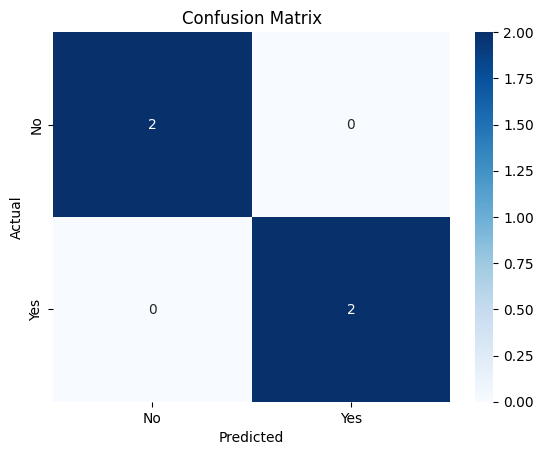

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("job_dataset.csv")

# Separate features and target
X = df.drop(columns=["Job offered?"])
y = df["Job offered?"]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


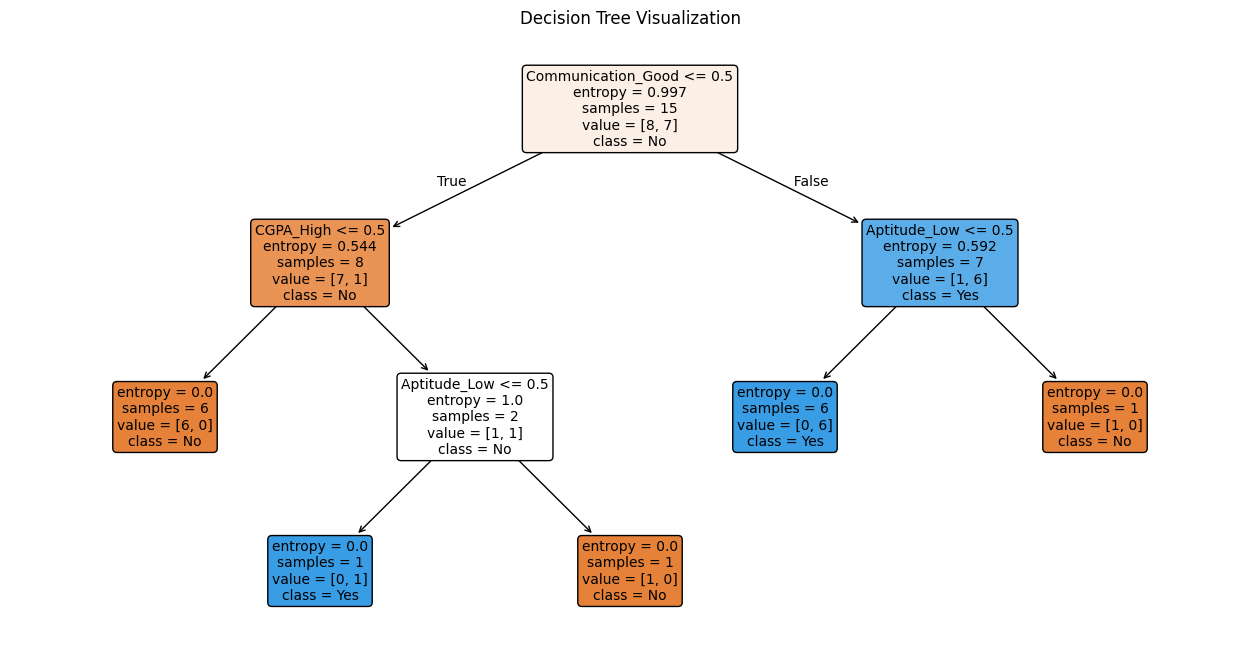

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))  # Adjust size depending on your dataset
plot_tree(
    clf, 
    feature_names=X_encoded.columns,   # column names after encoding
    class_names=clf.classes_,          # target class names
    filled=True,                       # fill nodes with colors
    rounded=True,                      # rounded boxes
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:

# print("Enter your name :")# Simple user input & prediction with clear console display
user_input = {}

# Ask user for each feature
user_input["CGPA"] = input("CGPA (low/medium/high): ").lower()
user_input["Aptitude"] = input("Aptitude (low/high): ").lower()
user_input["Programming Skill"] = input("Programming Skill(bad/good): ").lower()
user_input["Communication"] = input("Interview Performance (bad/good): ").lower()

# Show entered values back to user

print("\nYou entered:")
for feature, value in user_input.items():
    print(f"{feature}: {value}")

# Convert to DataFrame
user_df = pd.DataFrame([user_input])

# One-hot encode & align with training data
user_encoded = pd.get_dummies(user_df).reindex(columns=X_encoded.columns, fill_value=0)

# Predict
prediction = clf.predict(user_encoded)[0]
print(f"\n✅ Prediction for  Selection in Job: {prediction}")



You entered:
CGPA: low 
Aptitude: low
Programming Skill: bad
Communication: bad

✅ Prediction forlow SELECTION IN JOB: No


In [ ]:
df.head()

,CGPA,Communication,Aptitude,Programming Skill,Job offered?
0,High,Good,High,Good,Yes
1,Medium,Good,High,Good,Yes
2,Low,Bad,Low,Good,No
3,Low,Good,Low,Bad,No
4,High,Good,High,Bad,Yes
